In [1]:
pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

First few rows of data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    i

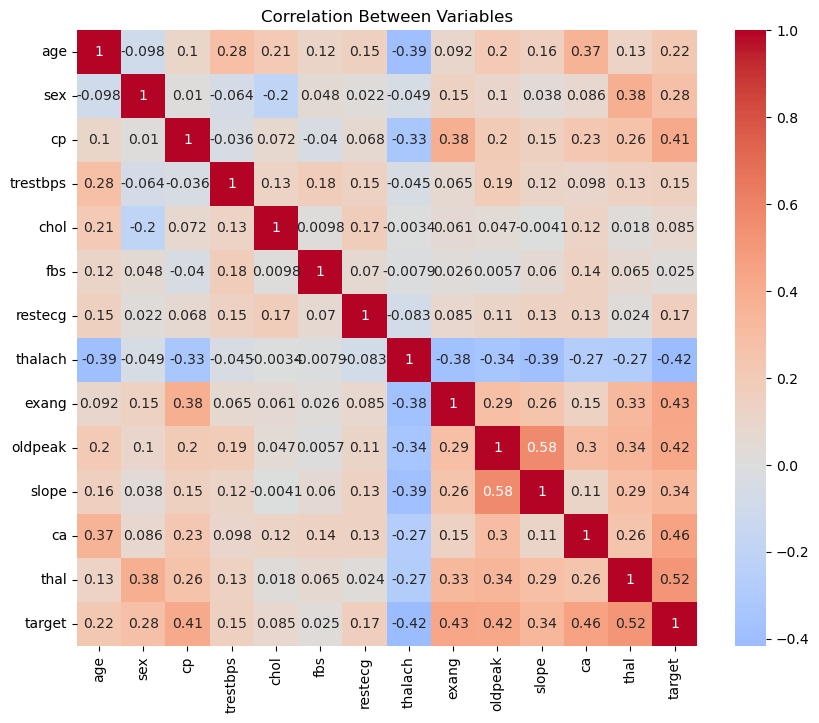

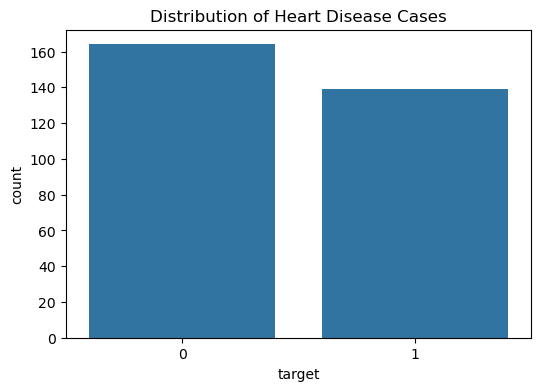

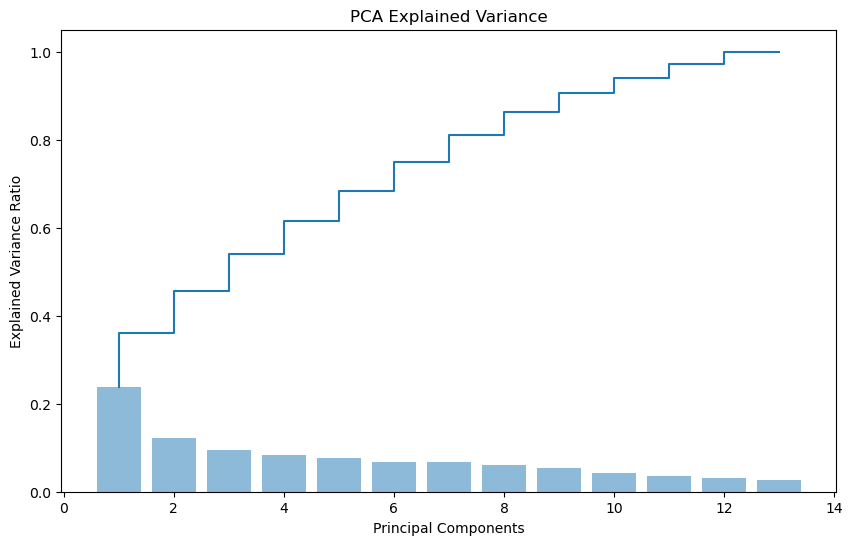

Reduced to 12 principal components


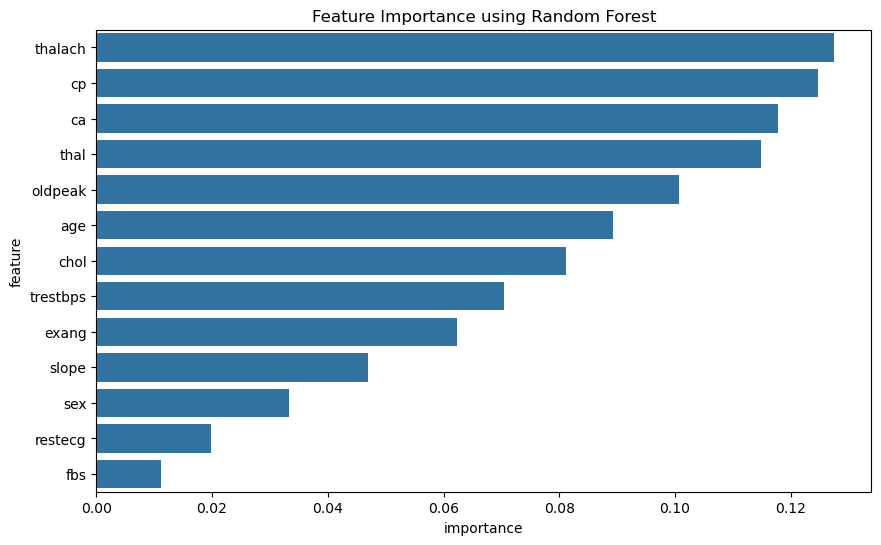

Selected features:
Index(['sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


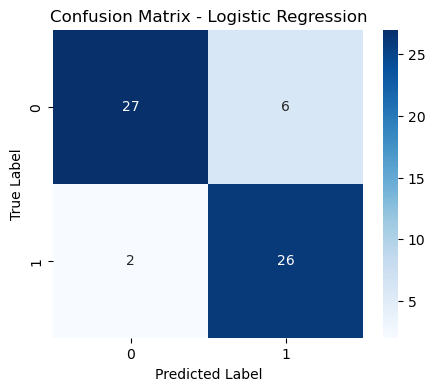

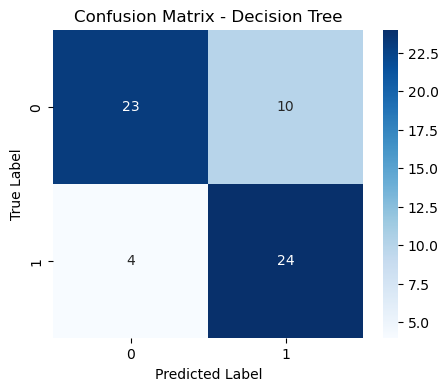

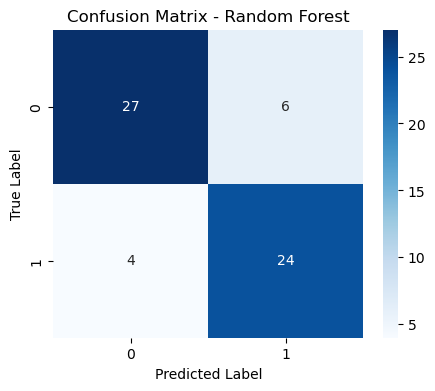

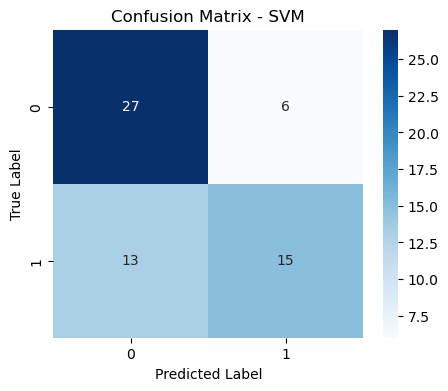

Model performance comparison:
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression  0.868852   0.812500  0.928571  0.866667  0.946970
Decision Tree        0.770492   0.705882  0.857143  0.774194  0.777056
Random Forest        0.836066   0.800000  0.857143  0.827586  0.938312
SVM                  0.688525   0.714286  0.535714  0.612245  0.796537


<Figure size 1200x600 with 0 Axes>

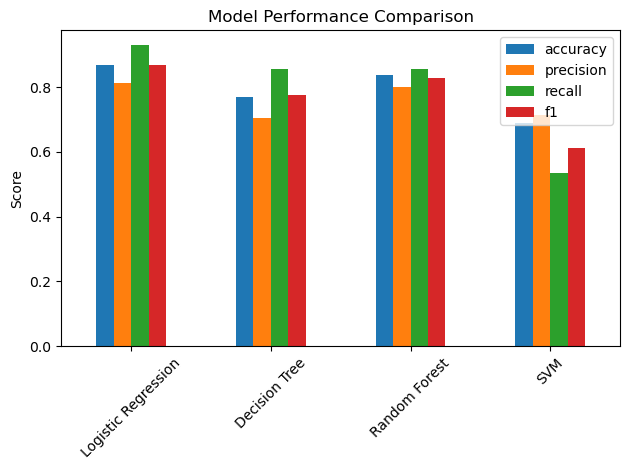

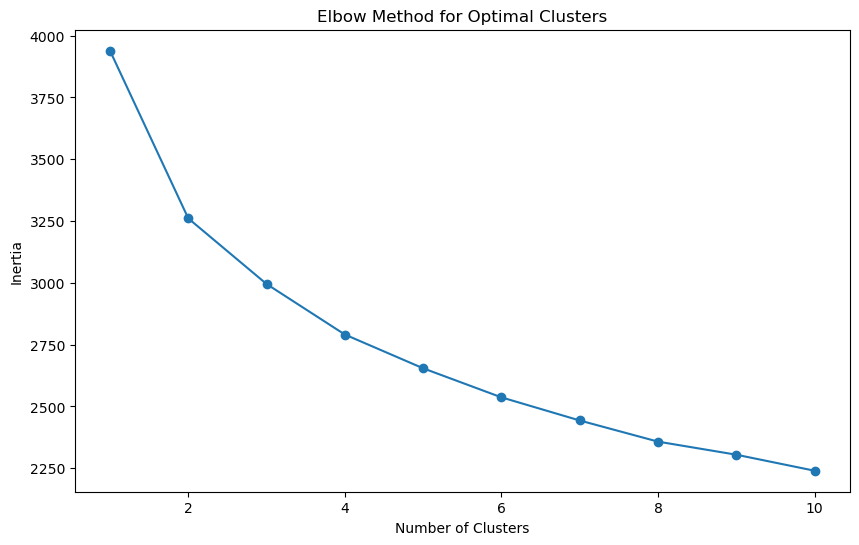

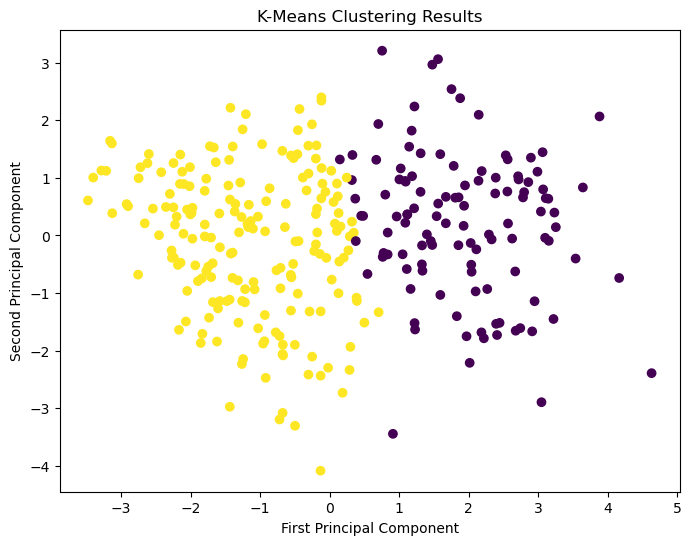

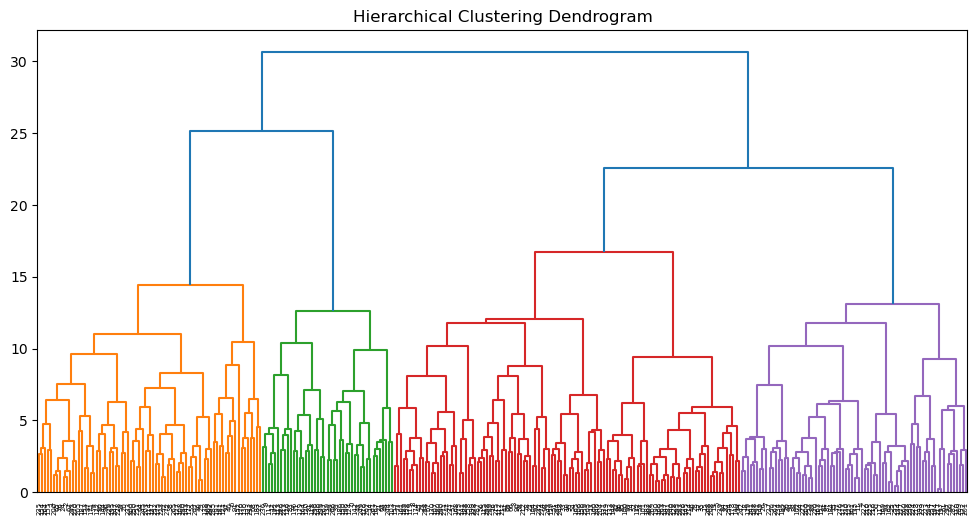

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8346088435374149
Best model accuracy: 0.8852459016393442
Model and scaler saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib

df = X.copy()
df['target'] = y

print("First few rows of data:")
print(df.head())

print("\nData information:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

print("Missing values after treatment:")
print(df.isnull().sum())

print("\nTarget value distribution:")
print(df['target'].value_counts())

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Variables')
plt.savefig('correlation_heatmap.png')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Cases')
plt.savefig('target_distribution.png')
plt.show()

X_data = df.drop('target', axis=1)
y_data = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.savefig('pca_variance.png')
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

print(f"Reduced to {n_components} principal components")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_data)

feature_importance = pd.DataFrame({'feature': X_data.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance using Random Forest')
plt.savefig('feature_importance.png')
plt.show()

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_scaled, y_data)

selected_features = X_data.columns[rfe.support_]
X_selected = X_data[selected_features]

print("Selected features:")
print(selected_features)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_data, test_size=0.2, random_state=42, stratify=y_data)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()

results_df = pd.DataFrame(results).T
print("Model performance comparison:")
print(results_df)

plt.figure(figsize=(12, 6))
results_df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('models_comparison.png')
plt.show()

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.savefig('elbow_method.png')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results')
plt.savefig('kmeans_clusters.png')
plt.show()

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.savefig('dendrogram.png')
plt.show()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

best_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Best model accuracy:", best_accuracy)

joblib.dump(best_rf_model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler ")